<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileCKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
DrugDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DrugDF.xlsx')
DrugDF.shape

(52620, 28)

> **Remove Pricipal keep StartDTTM and EndDTTM instead**

In [3]:
import pandas as pd
VisitDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VisitDF.xlsx')
VisitDF.shape

(52620, 13)

In [4]:
import pandas as pd
DiagDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DiagDF.xlsx')
DiagDF.shape

(52620, 20)

In [5]:
import pandas as pd
LabDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/LabDF.xlsx')
LabDF.shape

(52620, 36)

In [6]:
import pandas as pd
VitalDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VitalDF.xlsx')
VitalDF.shape

(52620, 8)

In [7]:
VisitDF = VisitDF.iloc[:, 1:]
VitalDF = VitalDF.iloc[:, 1:]
LabDF = LabDF.iloc[:, 1:]
DiagDF = DiagDF.iloc[:, 1:]
DrugDF = DrugDF.iloc[:, 1:]

> **eGFR visit[t+1]**

In [8]:
t1 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/t1.xlsx')
t1 = t1.iloc[:, 1:]


In [9]:
patient_uid_list = LabDF['PatientVisitUID'].unique().tolist()
t1 = t1[t1['PatientVisitUID'].isin(patient_uid_list)]
t1

,PatientUID,PatientVisitUID,eGFR_t1,time_t1
0,2299,3386255,63.60,2017-10-03 09:19:54.710
1,2299,4546471,70.20,2018-12-12 09:18:49.913
2,2299,5812902,64.02,2019-12-19 09:51:24.427
3,2299,6947220,48.54,2021-03-04 10:01:42.113
4,2299,8186767,80.47,2022-04-21 08:45:54.580
...,...,...,...,...
52618,3319961,9270330,33.68,2023-04-04 08:28:58.833
52619,3319971,9270331,26.47,2023-04-04 08:49:20.047
52620,3320048,9242721,70.36,2023-04-10 08:36:15.217
52621,3320050,9257281,30.69,2023-04-10 08:58:57.267


## **Merge**

In [10]:
import pandas as pd

# Assuming you have four dataframes: DrugDF1, DiagDF, DrugDF2, LabDF

# Merge DrugDF1, DiagDF, DrugDF2, and LabDF based on the common columns
merged_df = DrugDF.merge(VisitDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(VitalDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(DiagDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(LabDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(t1, on=['PatientUID', 'PatientVisitUID'], how='outer')
# The merged_df will contain all the data from the four dataframes, merged on the common columns.
merged_df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_t1,time_t1
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.60,2017-10-03 09:19:54.710
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.20,2018-12-12 09:18:49.913
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.02,2019-12-19 09:51:24.427
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.54,2021-03-04 10:01:42.113
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.47,2022-04-21 08:45:54.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,NaN,NaN,12.11,131.3,NaN,NaN,NaN,NaN,33.68,2023-04-04 08:28:58.833
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,NaN,NaN,9.15,325.8,NaN,NaN,NaN,NaN,26.47,2023-04-04 08:49:20.047
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.36,2023-04-10 08:36:15.217
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.69,2023-04-10 08:58:57.267


In [11]:
merged_df.shape

(52620, 90)

## **Add Variable**

> **LabLocation (mode) column and fill null in VisitLocation**

In [12]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

mode_location = lab.groupby('PatientUID')['Location'].apply(lambda x: x.mode()[0]).reset_index()
mode_dict = dict(zip(mode_location['PatientUID'], mode_location['Location']))
merged_df['Location'] = merged_df.apply(lambda row: mode_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)

In [13]:
merged_df['LabLocation'] = lab['PatientUID'].map(mode_location.set_index('PatientUID')['Location'])

In [14]:
merged_df.shape

(52620, 91)

> **LabCWhen**

In [15]:
lab_dict = dict(zip(lab['PatientVisitUID'], lab['CWhen']))
merged_df['LabCwhen'] = merged_df['PatientVisitUID'].map(lab_dict)

In [16]:
merged_df[['PatientUID','PatientVisitUID','LabCwhen']].isnull().any()

PatientUID         False
PatientVisitUID    False
LabCwhen           False
dtype: bool

In [17]:
merged_df[['PatientUID','PatientVisitUID','LabCwhen','time_t1','L1:eGFR','eGFR_t1']]

,PatientUID,PatientVisitUID,LabCwhen,time_t1,L1:eGFR,eGFR_t1
0,2299,3386255,2559-08-15 09:51:55.203,2017-10-03 09:19:54.710,71.7,63.60
1,2299,4546471,2560-10-03 09:19:54.920,2018-12-12 09:18:49.913,63.60,70.20
2,2299,5812902,2561-12-12 10:15:36.930,2019-12-19 09:51:24.427,70.20,64.02
3,2299,6947220,2562-12-19 09:51:24.577,2021-03-04 10:01:42.113,64.02,48.54
4,2299,8186767,2564-03-04 10:07:37.037,2022-04-21 08:45:54.580,48.54,80.47
...,...,...,...,...,...,...
52615,3319961,9270330,2565-03-14 15:10:29.530,2023-04-04 08:28:58.833,38.17,33.68
52616,3319971,9270331,2565-03-14 15:45:26.500,2023-04-04 08:49:20.047,27.20,26.47
52617,3320048,9242721,2565-03-05 17:34:10.677,2023-04-10 08:36:15.217,62.45,70.36
52618,3320050,9257281,2565-03-10 11:13:28.003,2023-04-10 08:58:57.267,66.18,30.69


In [18]:
merged_df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_t1,time_t1,LabLocation,LabCwhen
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,63.60,2017-10-03 09:19:54.710,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,70.20,2018-12-12 09:18:49.913,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,64.02,2019-12-19 09:51:24.427,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.54,2021-03-04 10:01:42.113,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,80.47,2022-04-21 08:45:54.580,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,12.11,131.3,NaN,NaN,NaN,NaN,33.68,2023-04-04 08:28:58.833,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-14 15:10:29.530
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,9.15,325.8,NaN,NaN,NaN,NaN,26.47,2023-04-04 08:49:20.047,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-14 15:45:26.500
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,70.36,2023-04-10 08:36:15.217,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-05 17:34:10.677
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,30.69,2023-04-10 08:58:57.267,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-10 11:13:28.003


> **VisitLocation**

In [19]:
merged_result = merged_df.rename(columns={'Location': 'VisitLocation'})

In [20]:
merged_result.shape

(52620, 92)

>> **Fill null of StartDTTM and EndDttm** by mode of each ID

In [21]:
import pandas as pd
visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')
mode_start = visit.groupby('PatientUID')['StartDTTM'].apply(lambda x: x.mode()[0]).reset_index()
mode_dt = dict(zip(mode_start['PatientUID'], mode_start['StartDTTM']))
merged_result['StartDTTM'] = merged_result.apply(lambda row: mode_dt[row['PatientUID']] if pd.isnull(row['StartDTTM']) else row['StartDTTM'], axis=1)

mode_end = visit.groupby('PatientUID')['EndDttm'].apply(lambda x: x.mode()[0]).reset_index()
mode_tm = dict(zip(mode_end['PatientUID'], mode_end['EndDttm']))
merged_result['EndDttm'] = merged_result.apply(lambda row: mode_tm[row['PatientUID']] if pd.isnull(row['EndDttm']) else row['EndDttm'], axis=1)

<ipython-input-21-871b6ce98197>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')


In [22]:
merged_result['PatientUID'].nunique() #number of patient

18168

In [23]:
merged_result.shape

(52620, 92)

> **Hand fill missing value**

In [24]:
merged_result['Age'] = merged_result['Age'].fillna('69')
merged_result['Sex'] = merged_result['Sex'].fillna('หญิง')
merged_result['NATNL'] = merged_result['NATNL'].fillna('ไทย')
merged_result['InPatient'] = merged_result['InPatient'].fillna(0)
merged_result['OutPatient'] = merged_result['OutPatient'].fillna(1)
merged_result['Emergency'] = merged_result['Emergency'].fillna(0)

##**Check Type**

In [25]:
df = pd.DataFrame(merged_result)

In [26]:
int_type = ['InPatient', 'OutPatient', 'Emergency','Age']
float_type = ['L1:eGFR','L2:BUN', 'L3:Creatinine','L4:Sodium','L5:Potassium','L6:Chloride','L7:Bicarbonate','L8:Uric',
              'L9:Calcium','L10:Phosphorus', 'L11:Albumin','L12:Hemoglobin','L13:Hematocrit','L14:WBC','L15:Platelet','L16:TIBC',
              'L17:Tranferin SAT','L18:Ferritin','L19:Blood sugar','L20:HbA1c','L21:Cholesterol','L22:Triglyceride','L23:LDL Cholesterol',
              'L24:HDL Cholesterol','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio','L28:UrineProtein/Cr ratio',
              'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)','L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)',
              'BMI','BSA','Systolic BP','Diastolic BP','eGFR_t1']
object_type = ['LabLocation','VisitLocation','NATNL','Sex']
datetime_type = ['LabCWhen','time_t1','StartDTTM','EndDttm'] ## ใช้เป็น object เหมือนเดิม

In [27]:
import numpy as np
for column in int_type:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

for column in float_type:
    df[column] = pd.to_numeric(df[column], errors='coerce')

for column in object_type:
    df[column] = df[column].astype(str)

# Replace 'ND' values with NaN
df.replace('ND', np.nan, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52620 entries, 0 to 52619
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   G1M2:ARB                      52620 non-null  int64         
 4   G3M1:Statin                   52620 non-null  int64         
 5   G5M2:NSAIDs                   52620 non-null  int64         
 6   G1M5:Diuretic                 52620 non-null  int64         
 7   G1M7:Beta blocker             52620 non-null  int64         
 8   G1M3:Dihydropyridine CCB      52620 non-null  int64         
 9   G1M6:MRA                      52620 non-null  int64         
 10  G1M1:ACEI                     52620 non-null  int64         
 11  G2M2:Metformin              

### **CheckMissing**

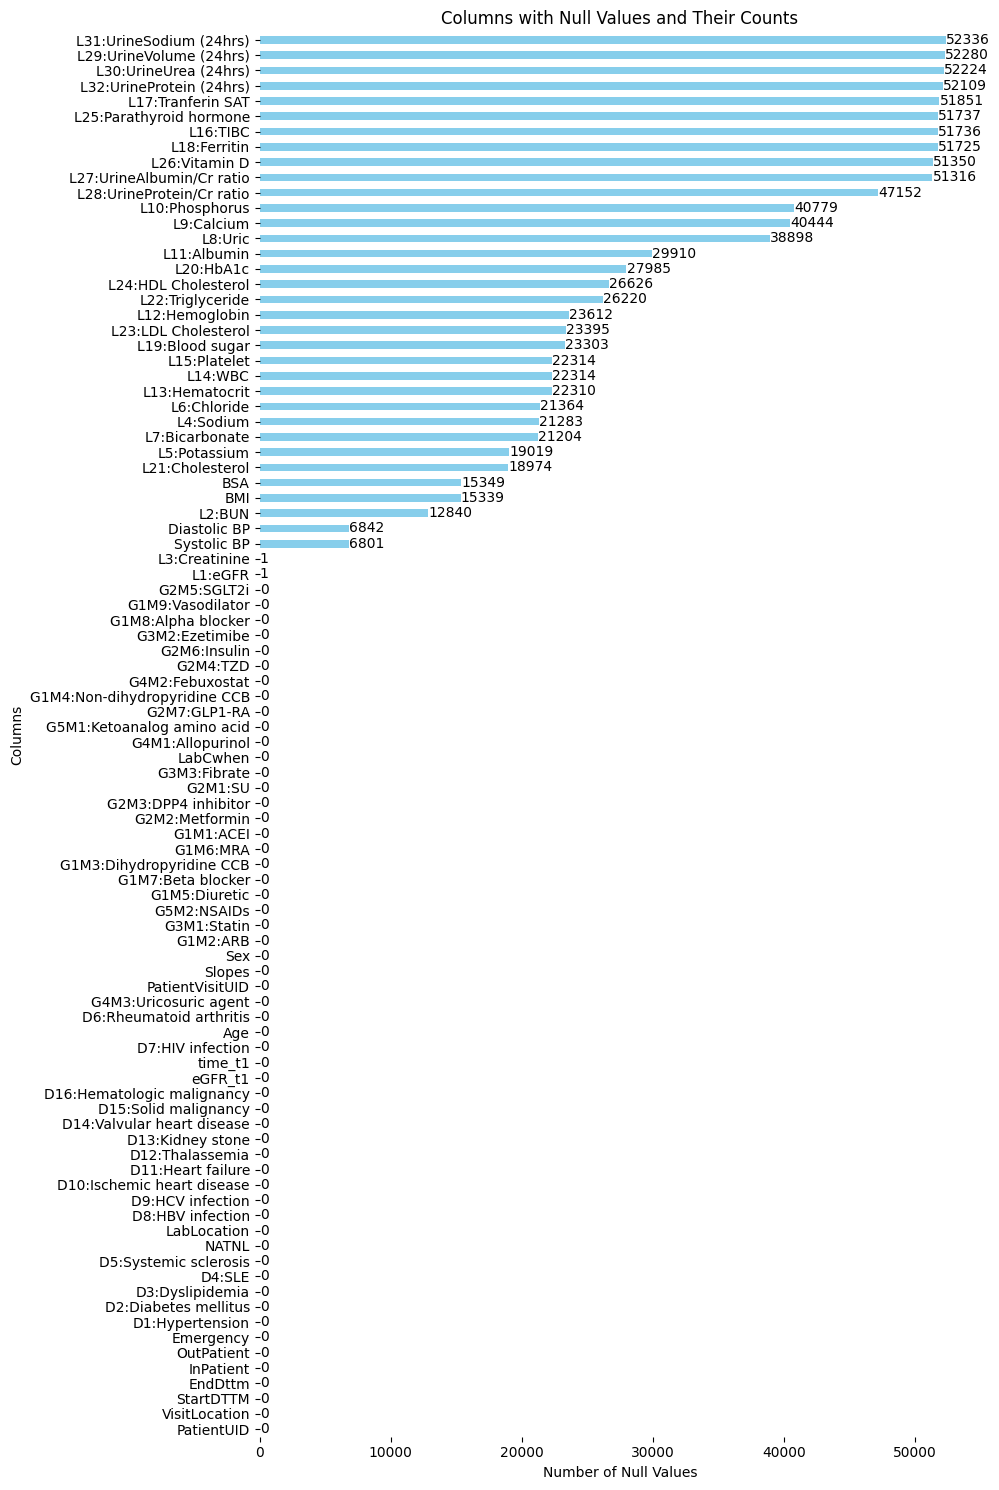

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()


>> **Outliers**

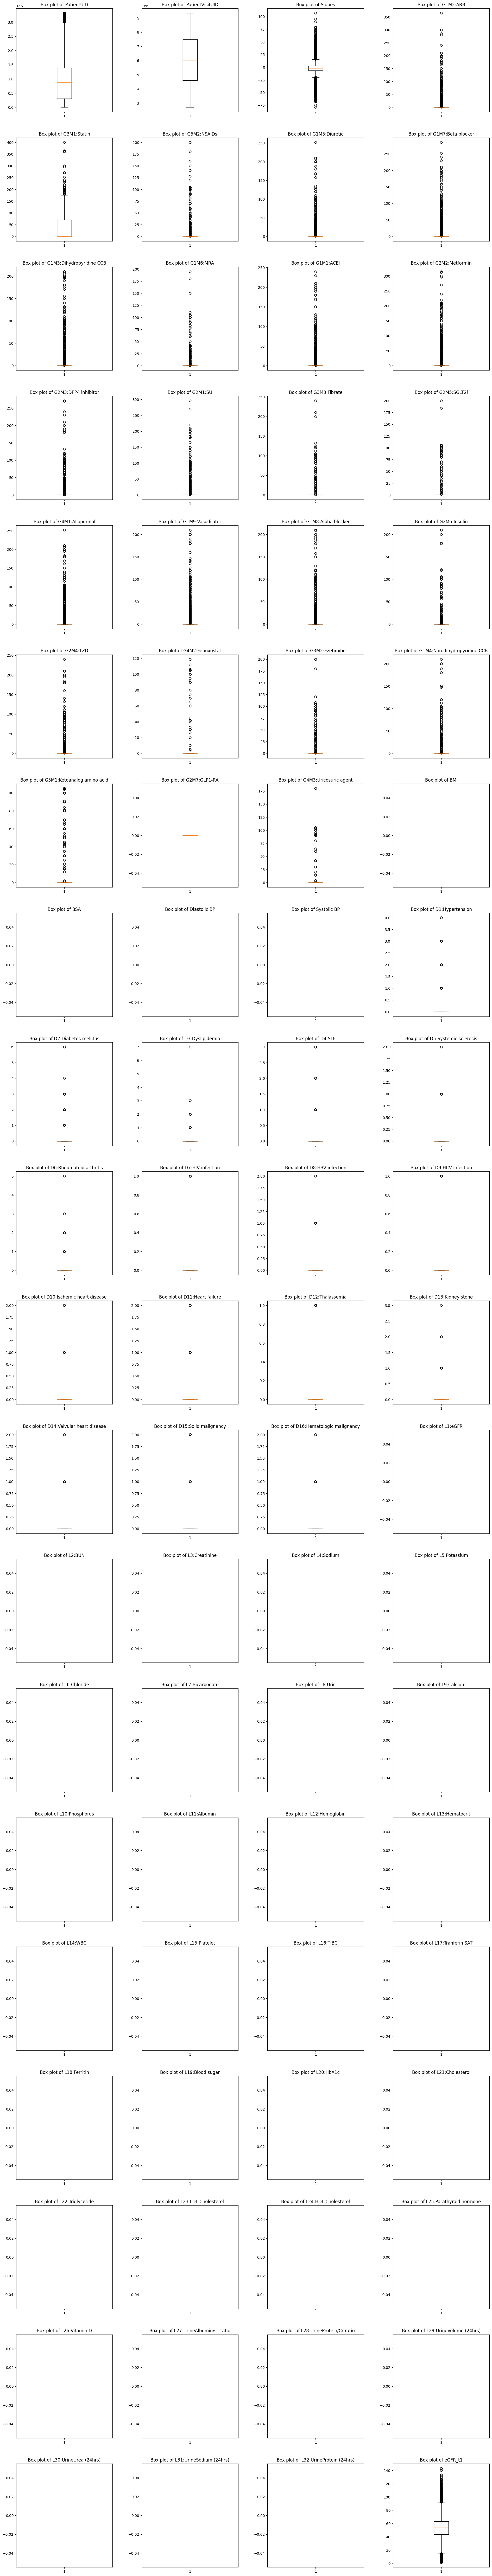

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_columns)
num_plots_per_row = 4
num_rows = num_cols // num_plots_per_row + 1

fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numeric_columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    axs[row, col].boxplot(df[column])
    axs[row, col].set_title('Box plot of ' + column)

# Hide empty subplots
for i in range(num_cols, num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axs[row, col])

plt.show()


>>> **non null column**

<ipython-input-31-9bbd018d624c>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numeric_columns = df.select_dtypes(include=[pd.np.number]).columns.tolist()


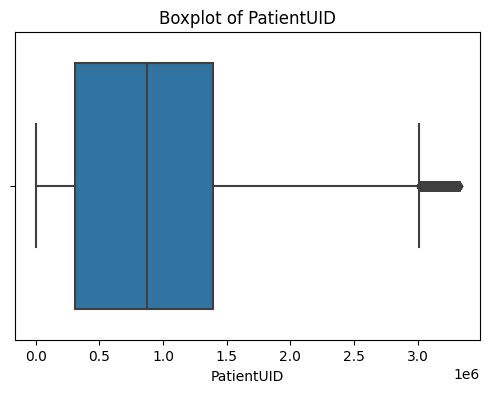

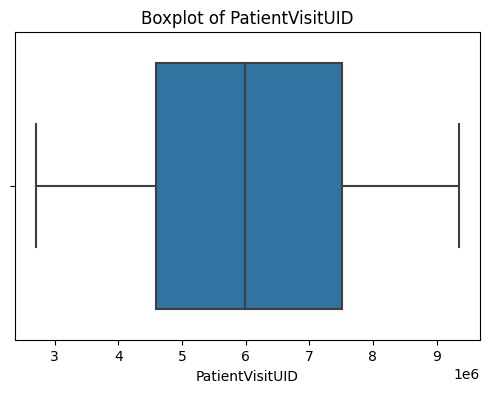

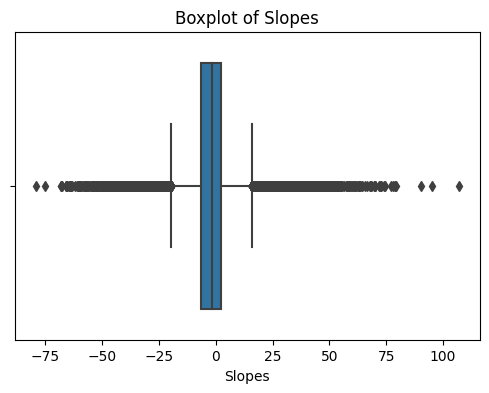

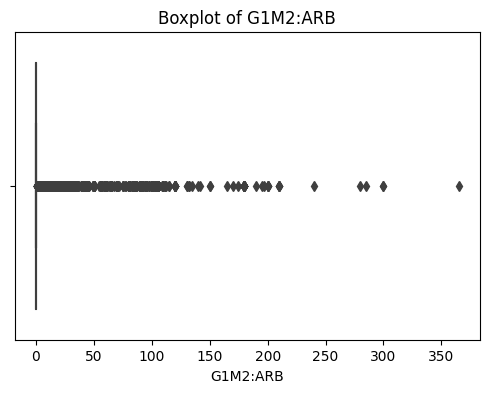

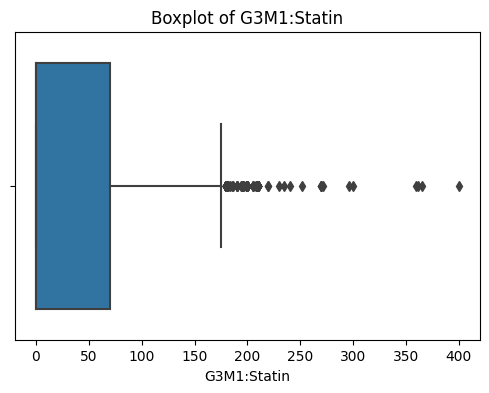

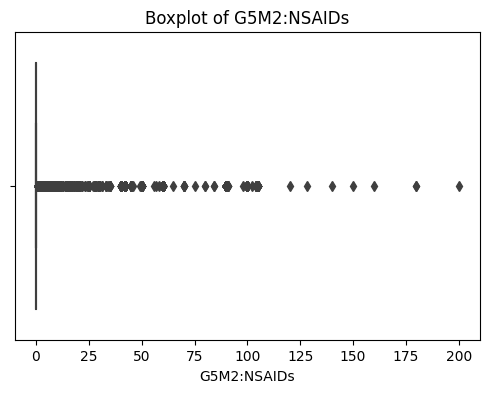

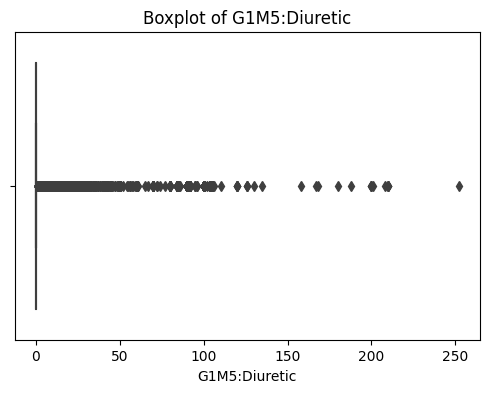

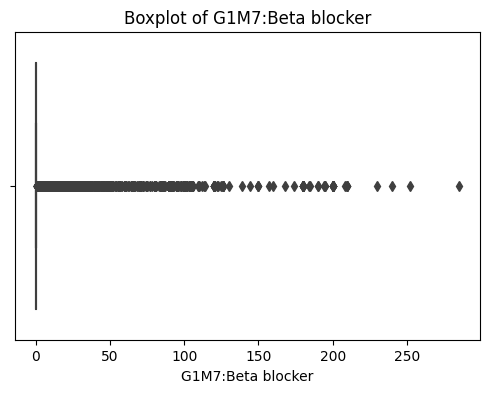

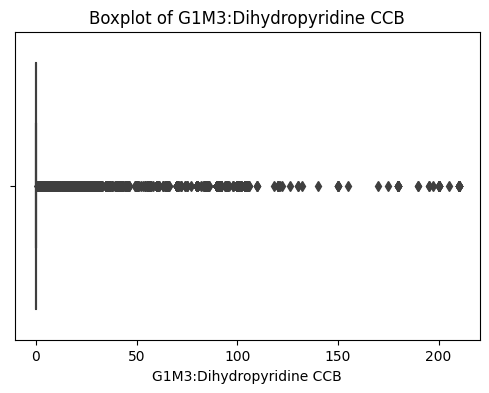

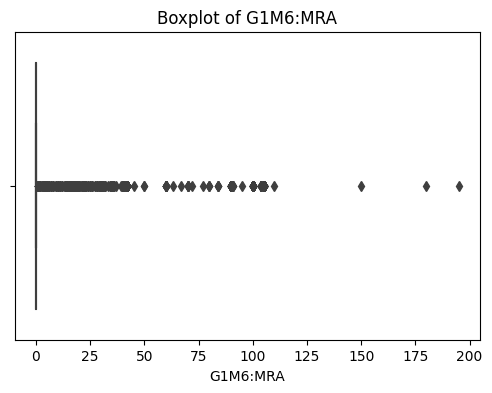

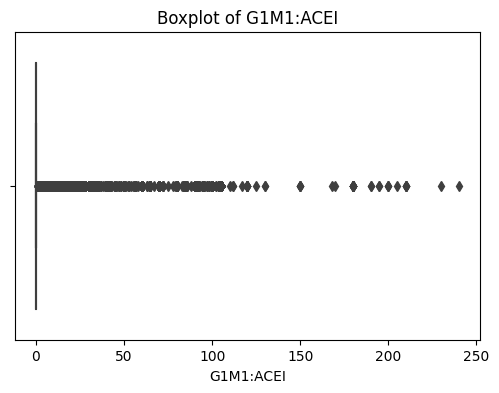

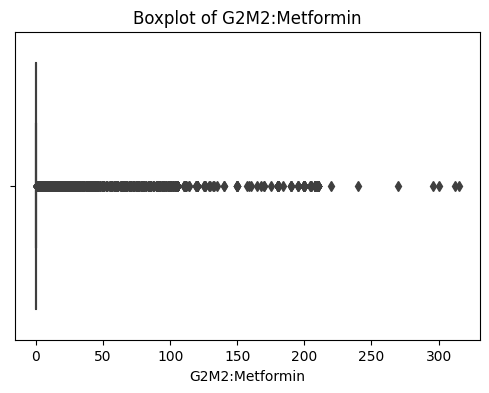

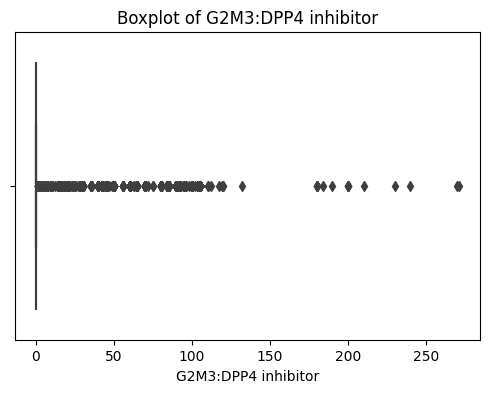

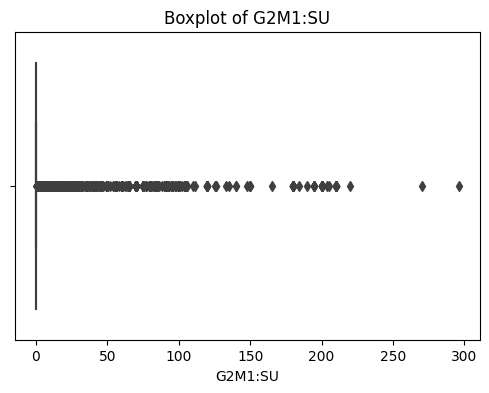

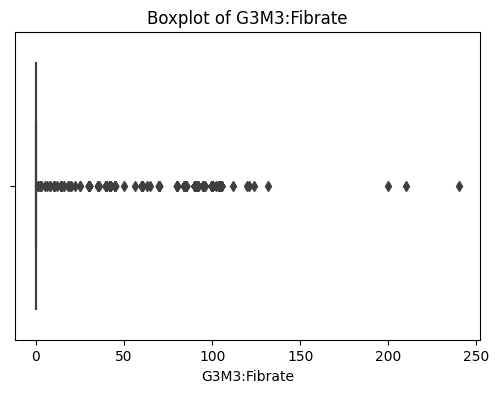

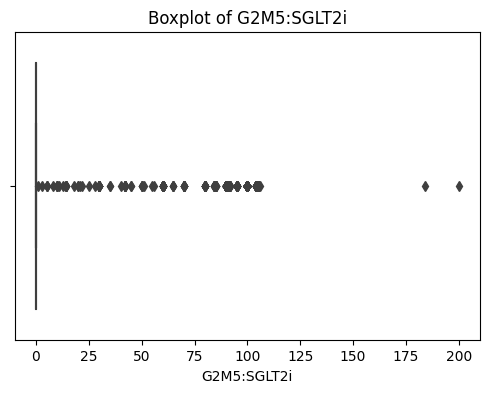

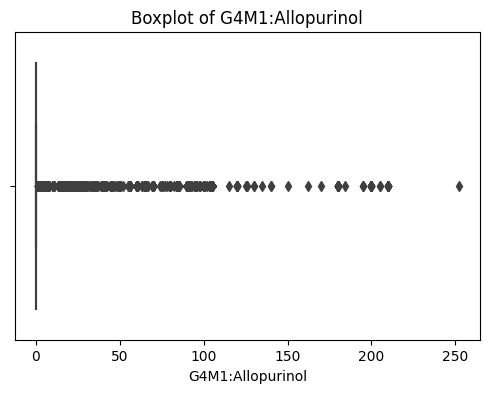

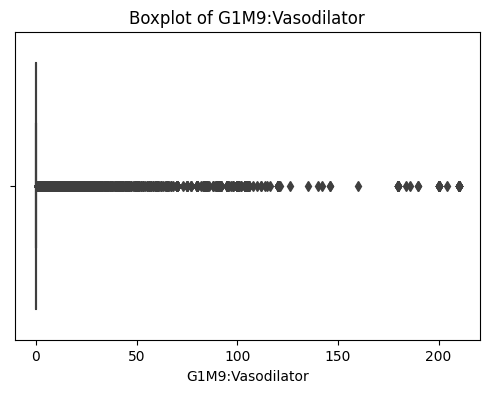

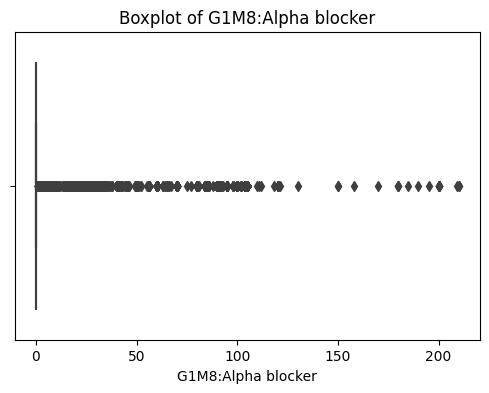

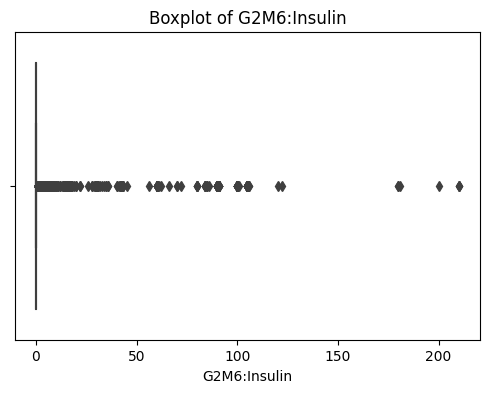

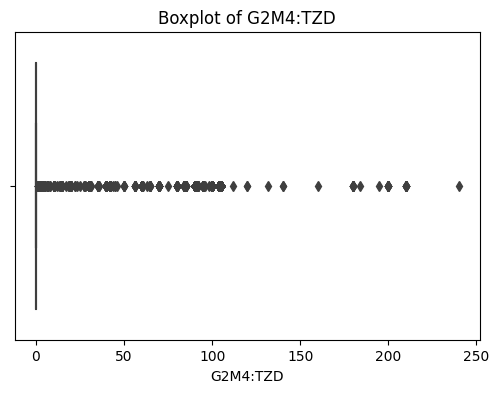

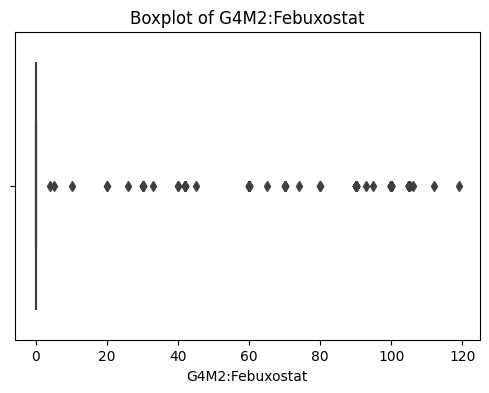

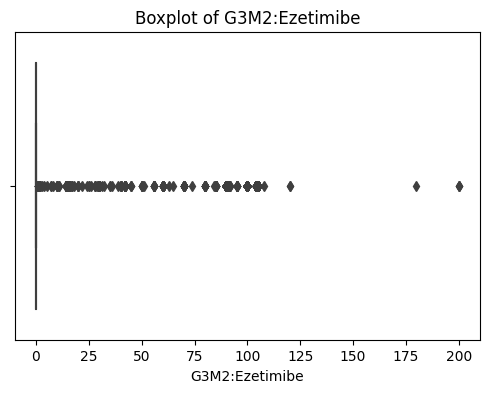

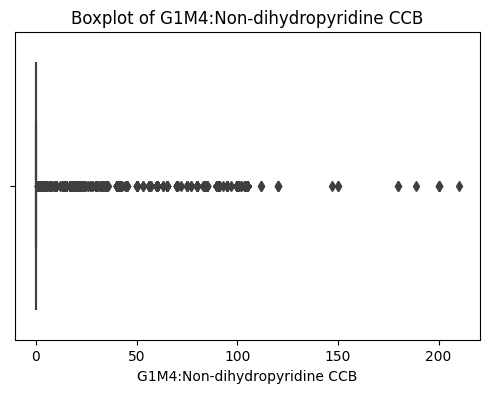

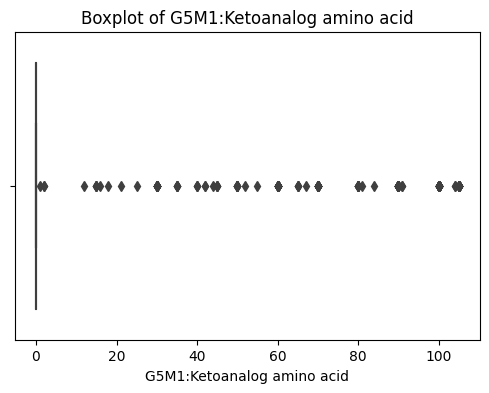

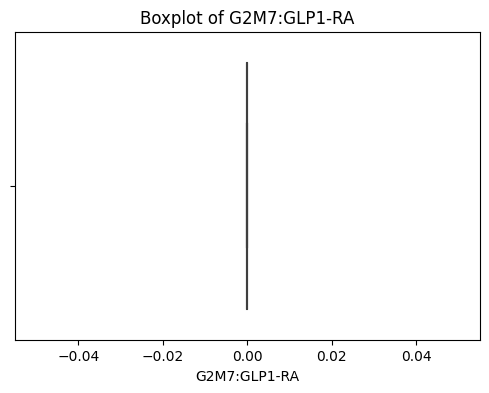

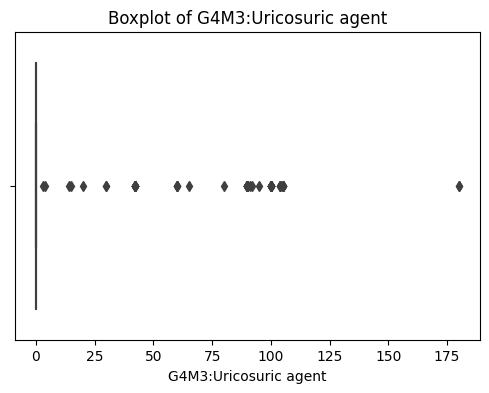

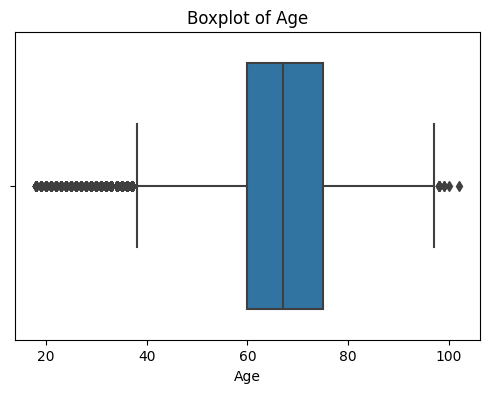

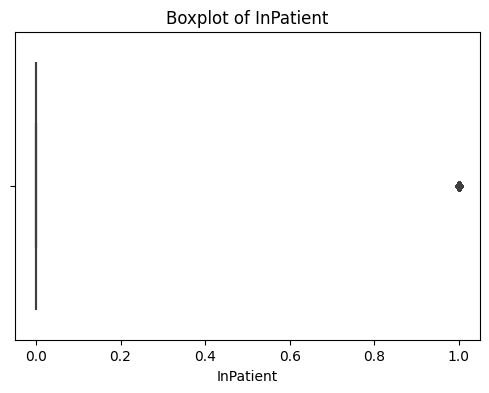

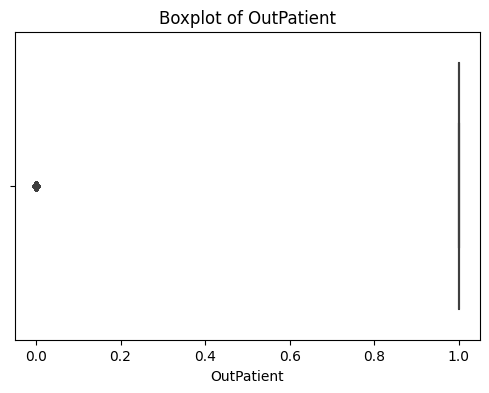

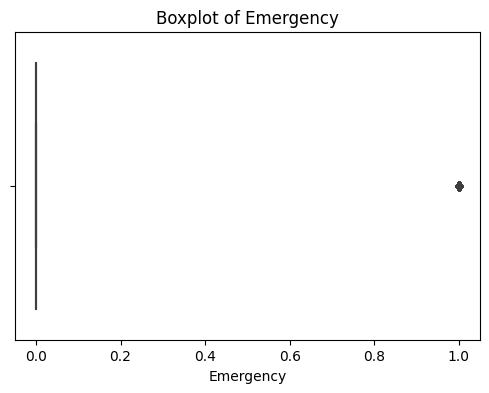

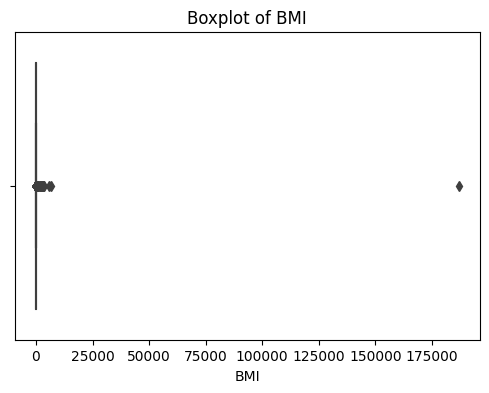

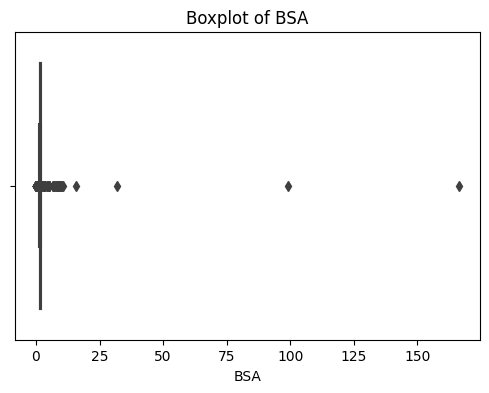

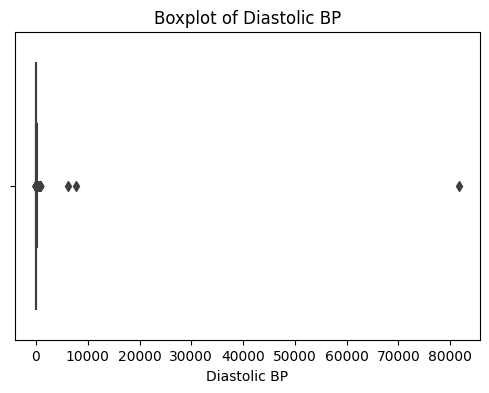

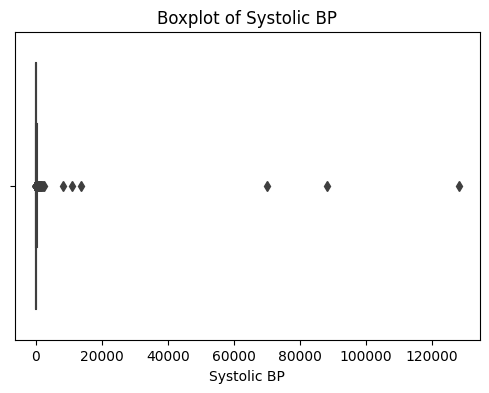

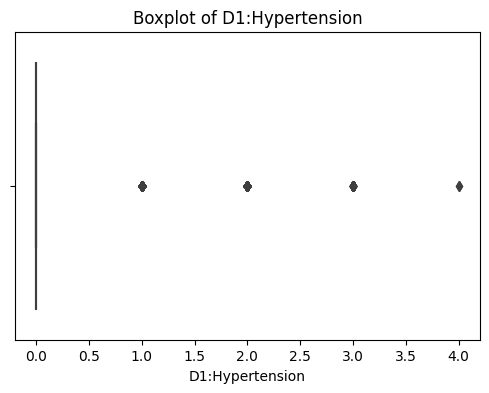

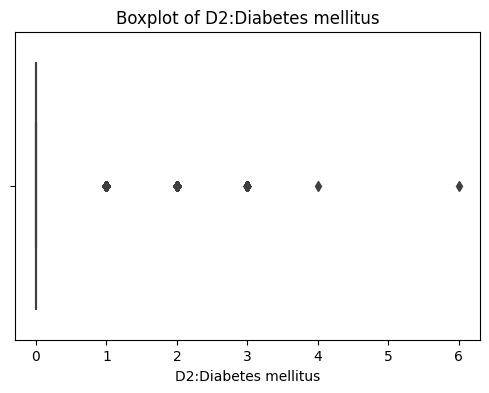

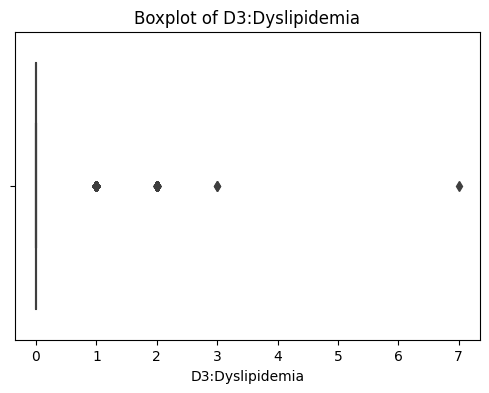

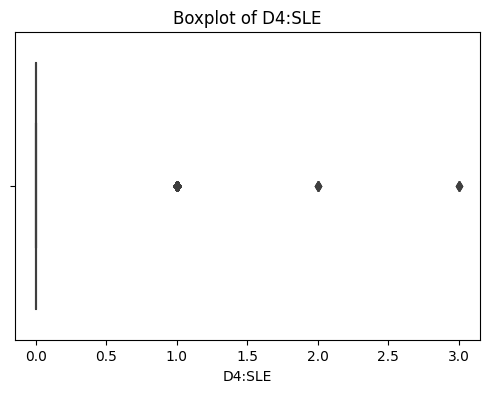

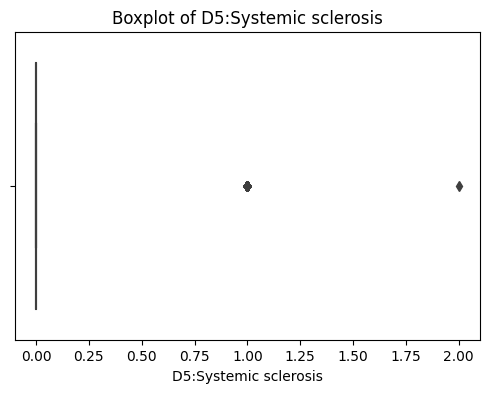

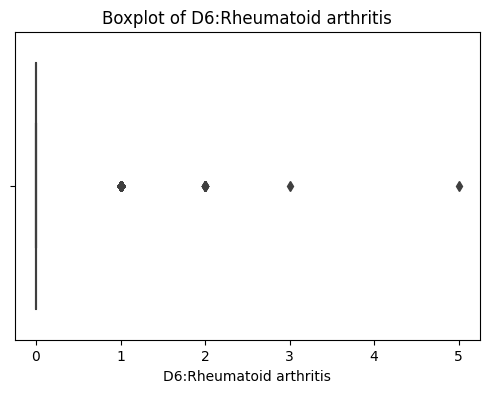

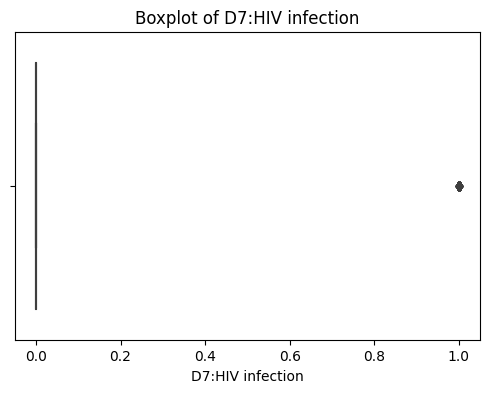

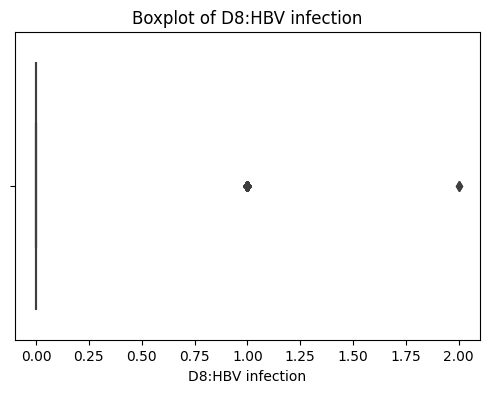

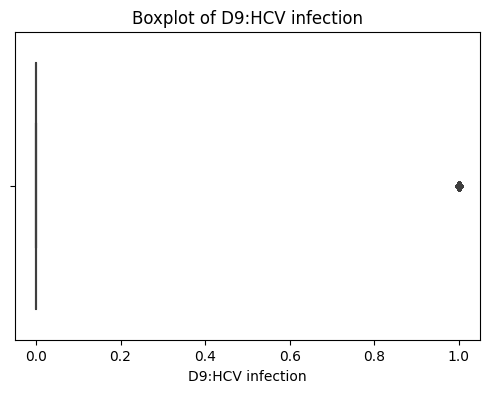

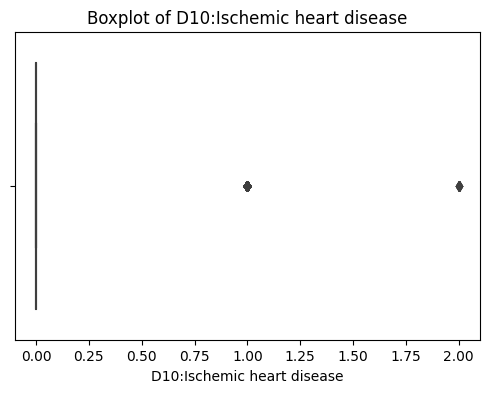

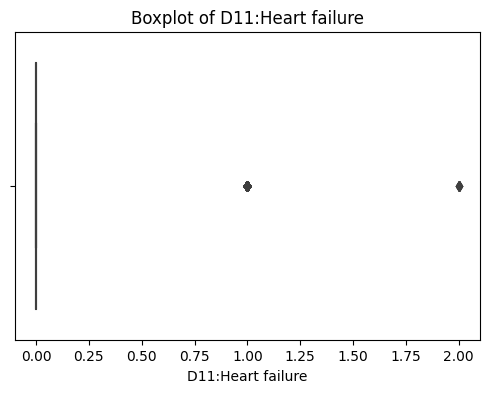

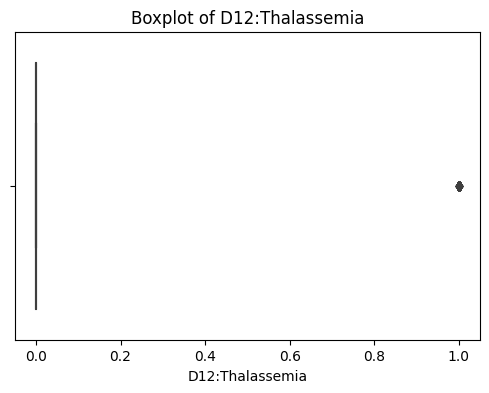

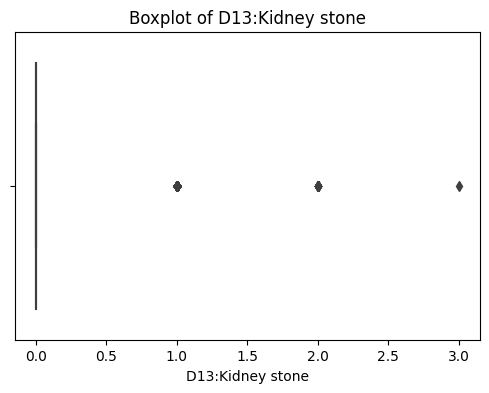

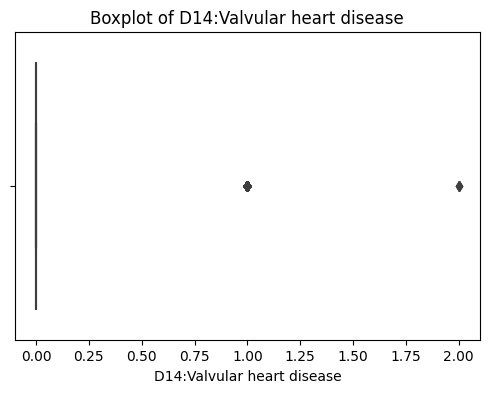

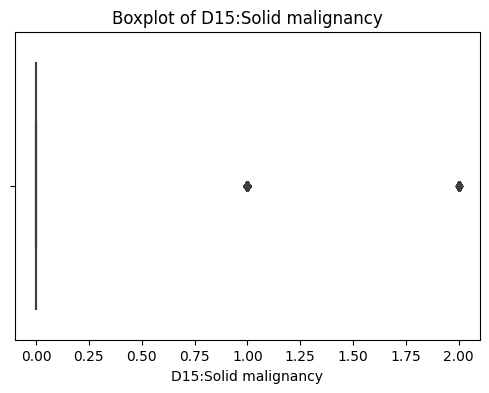

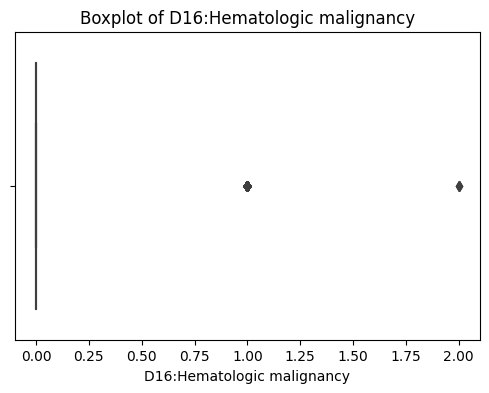

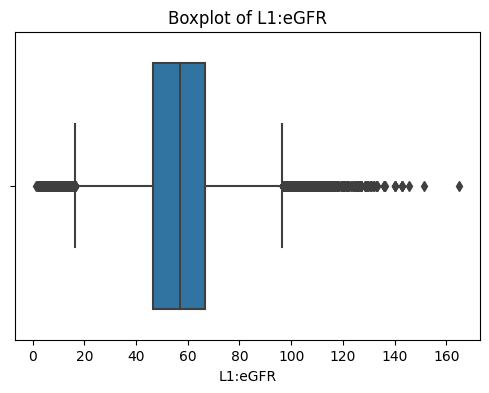

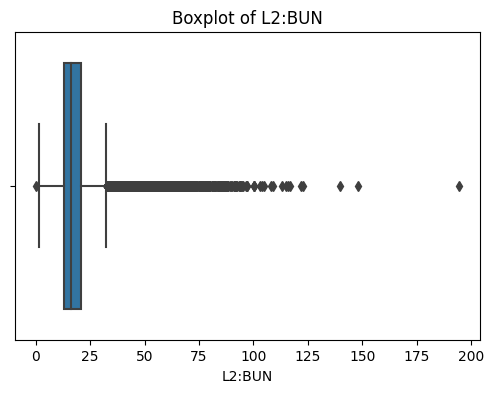

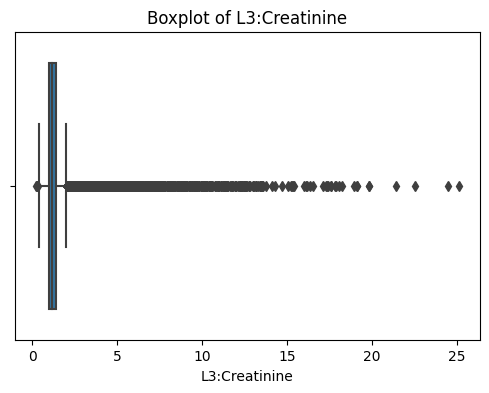

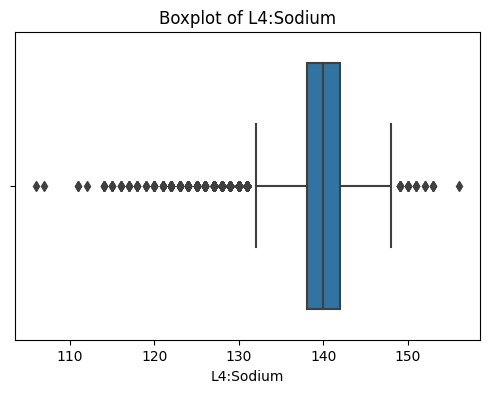

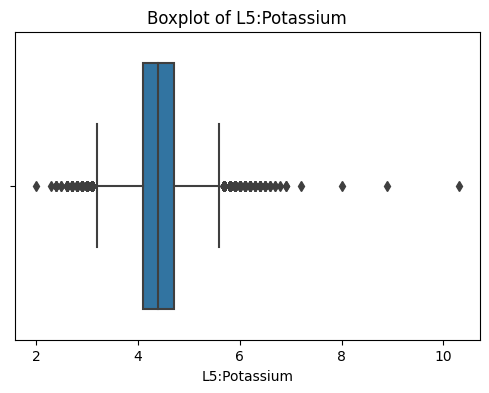

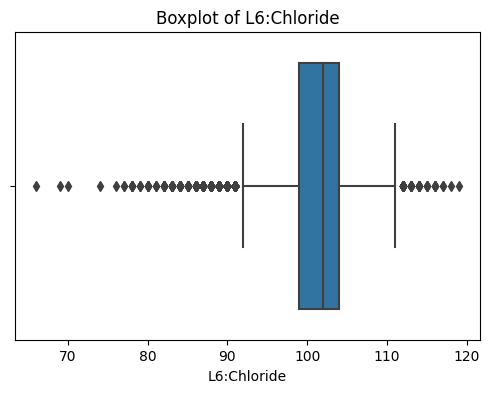

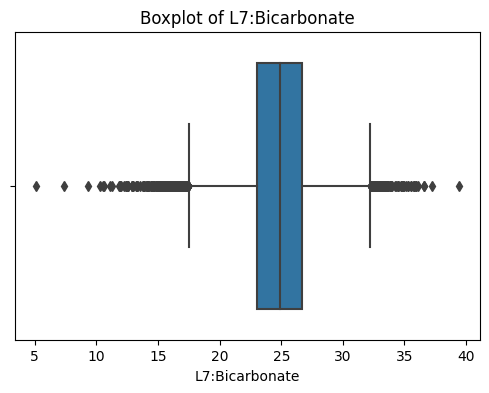

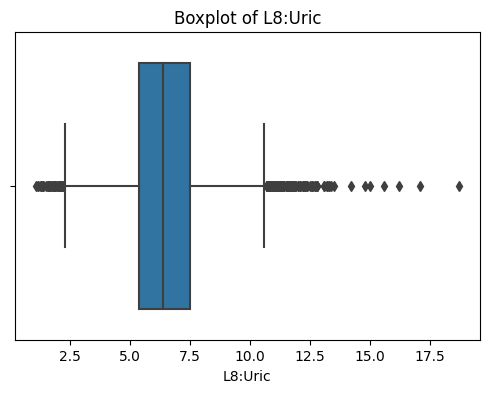

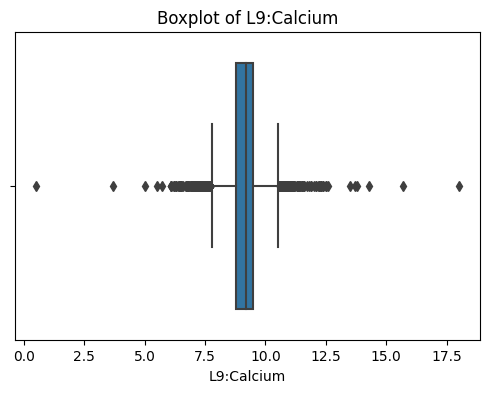

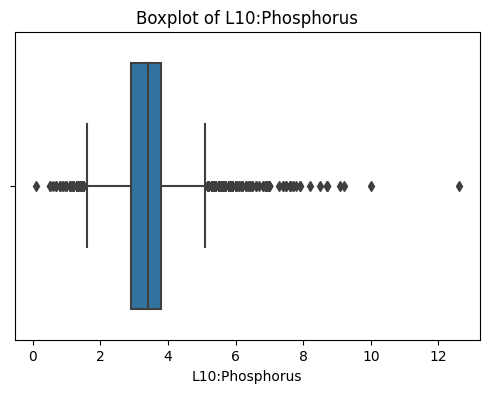

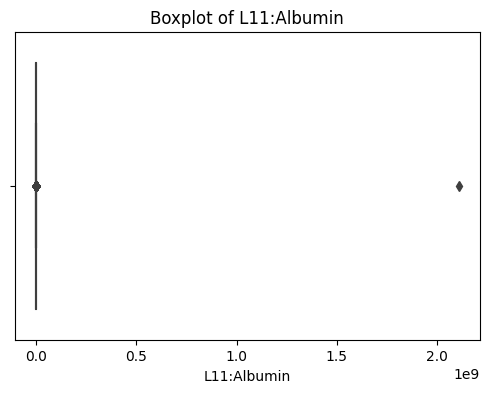

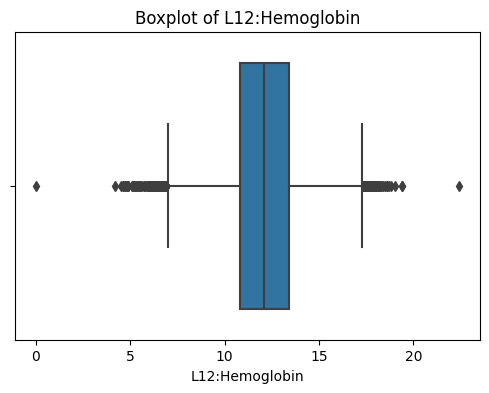

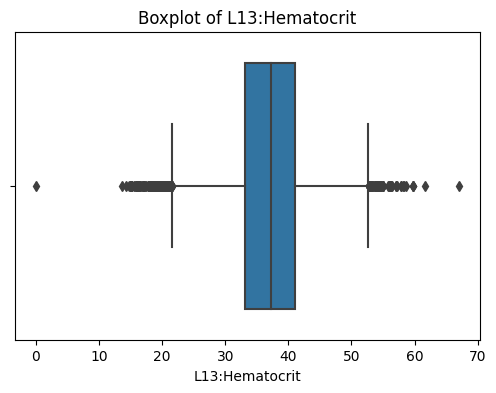

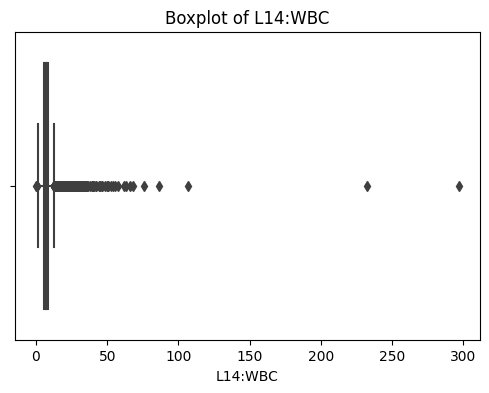

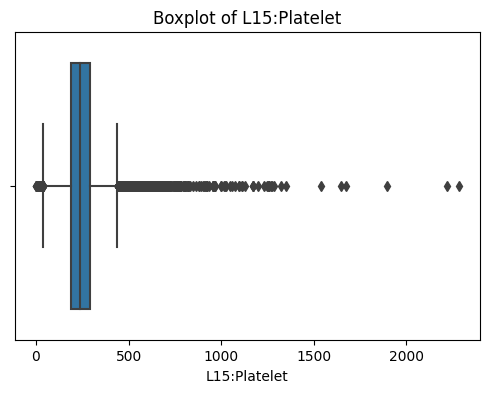

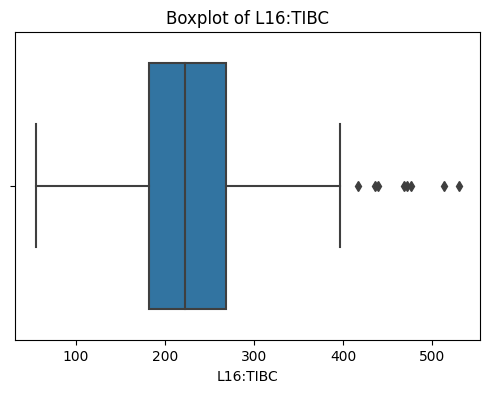

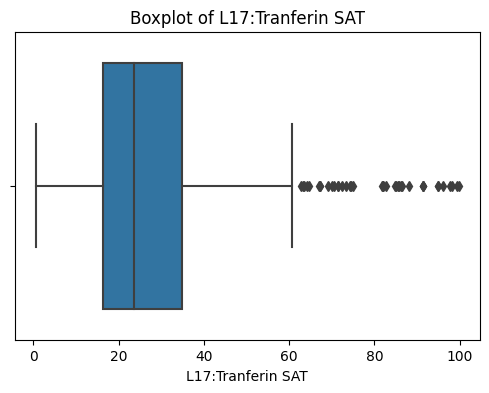

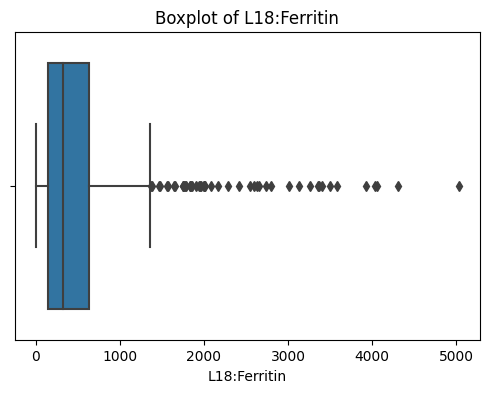

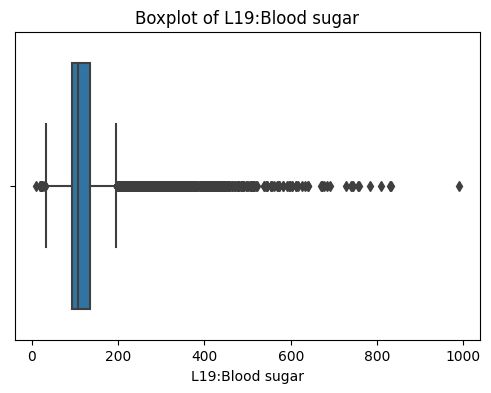

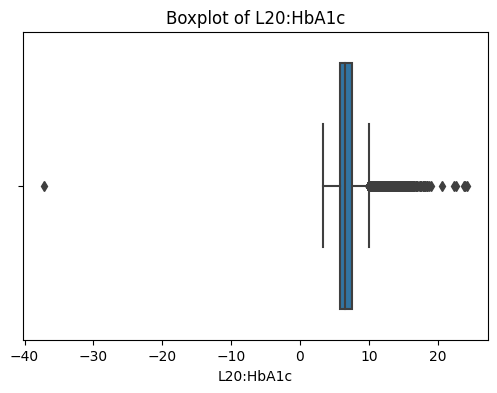

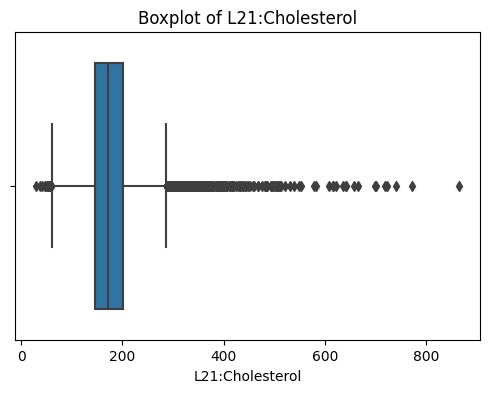

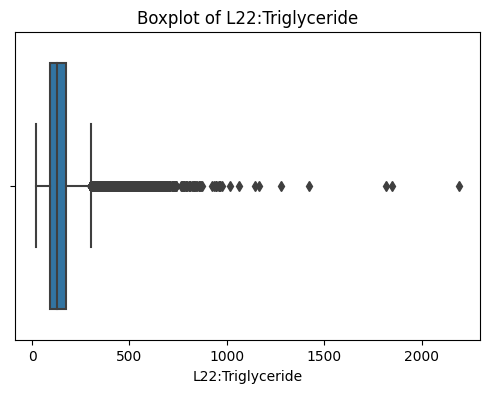

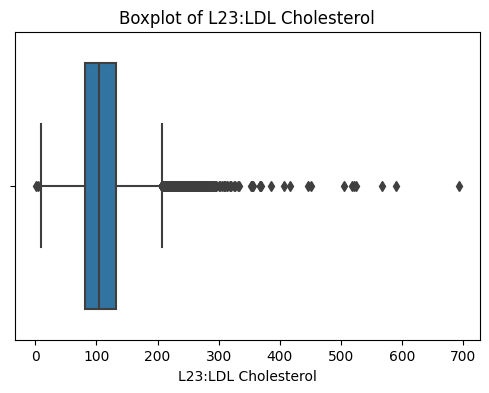

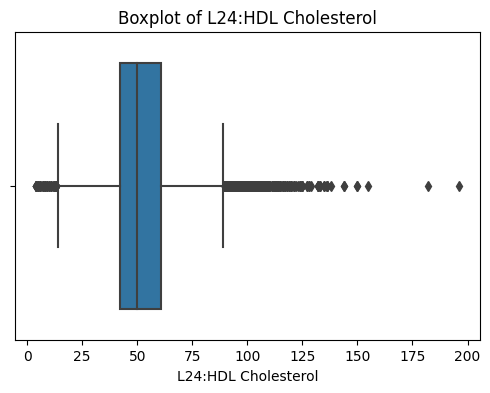

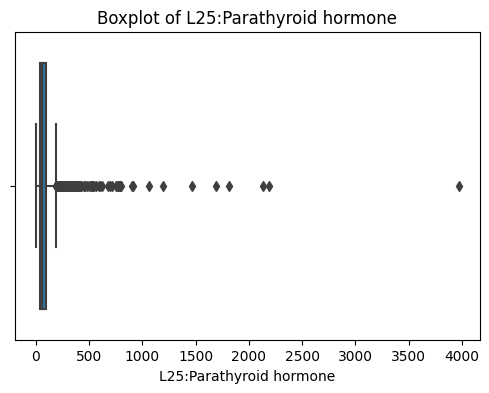

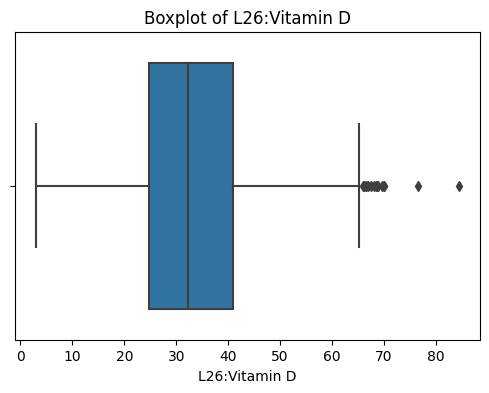

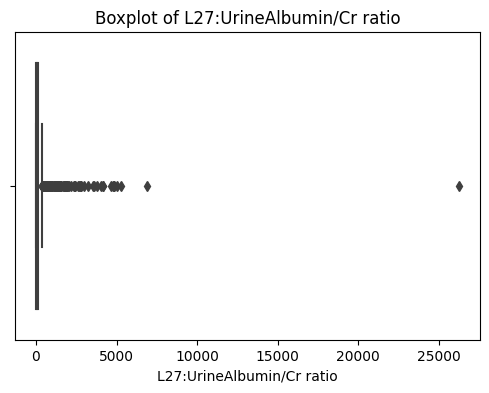

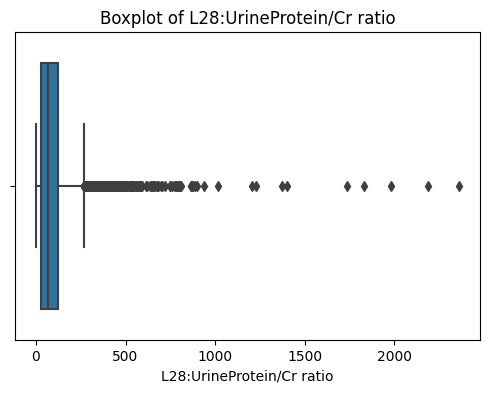

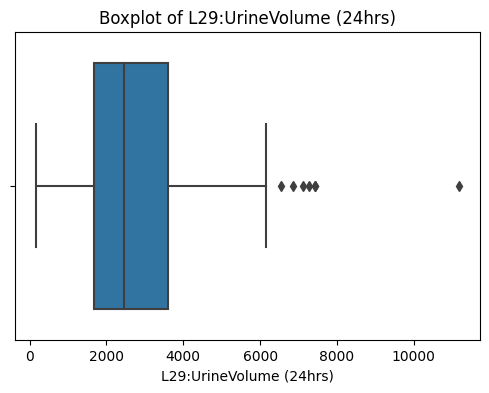

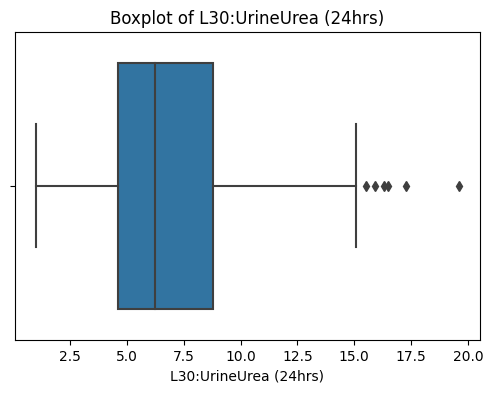

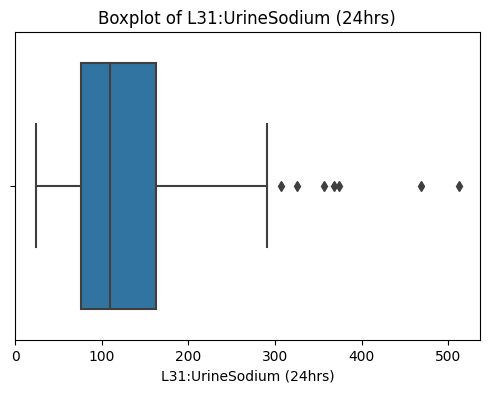

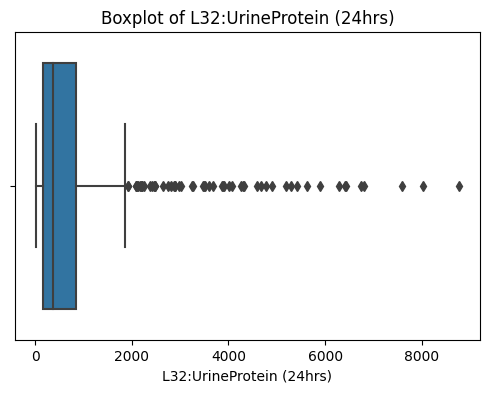

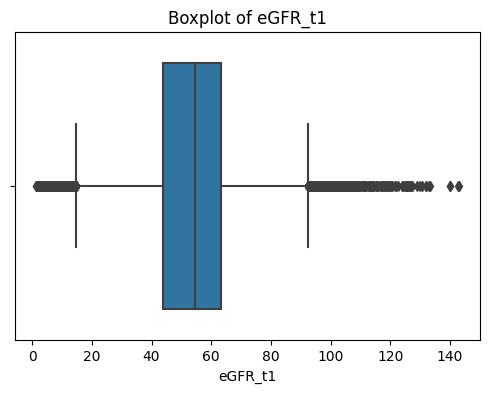

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Filter numeric non-null columns
numeric_columns = df.select_dtypes(include=[pd.np.number]).columns.tolist()

# Create box plots for each column
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [32]:

import pandas as pd

# Assuming df is your DataFrame

# Select columns that contain null values
columns_with_null = [col for col in df.columns if df[col].isnull().any()]

# Define a function to detect outliers using z-score for columns with null values
def detect_outliers_z_score(data, columns, threshold=3):
    outliers = {}
    for column in columns:
        column_data = data[column]
        if any(abs((column_data - column_data.mean()) / column_data.std()) > threshold):
            outliers[column] = column_data
    return outliers

# Detect columns with outliers for columns that have null values using the z-score method
outliers = detect_outliers_z_score(df, columns_with_null)
columns_with_outliers = list(outliers.keys())
columns_without_outliers = [col for col in columns_with_null if col not in columns_with_outliers]

print("Columns with outliers and null values:")
print(columns_with_outliers)

print("\nColumns without outliers and null values:")
print(columns_without_outliers)


Columns with outliers and null values:
['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin', 'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC', 'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D', 'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio', 'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)', 'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)']

Columns without outliers and null values:
[]


In [33]:
df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_t1,time_t1,LabLocation,LabCwhen
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,63.60,2017-10-03 09:19:54.710,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,70.20,2018-12-12 09:18:49.913,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,64.02,2019-12-19 09:51:24.427,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.54,2021-03-04 10:01:42.113,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,80.47,2022-04-21 08:45:54.580,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,12.11,131.3,NaN,NaN,NaN,NaN,33.68,2023-04-04 08:28:58.833,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-14 15:10:29.530
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,9.15,325.8,NaN,NaN,NaN,NaN,26.47,2023-04-04 08:49:20.047,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-14 15:45:26.500
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,70.36,2023-04-10 08:36:15.217,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-05 17:34:10.677
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,30.69,2023-04-10 08:58:57.267,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2565-03-10 11:13:28.003


##**Remove Missing Variable 50k up**


In [34]:
remove = ['L16:TIBC','L17:Tranferin SAT','L18:Ferritin','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio',
          'L29:UrineVolume (24hrs)','L30:UrineUrea (24hrs)','L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)']
df = df.drop(remove, axis=1)

In [35]:
df.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'G1M2:ARB', 'G3M1:Statin',
       'G5M2:NSAIDs', 'G1M5:Diuretic', 'G1M7:Beta blocker',
       'G1M3:Dihydropyridine CCB', 'G1M6:MRA', 'G1M1:ACEI', 'G2M2:Metformin',
       'G2M3:DPP4 inhibitor', 'G2M1:SU', 'G3M3:Fibrate', 'G2M5:SGLT2i',
       'G4M1:Allopurinol', 'G1M9:Vasodilator', 'G1M8:Alpha blocker',
       'G2M6:Insulin', 'G2M4:TZD', 'G4M2:Febuxostat', 'G3M2:Ezetimibe',
       'G1M4:Non-dihydropyridine CCB', 'G5M1:Ketoanalog amino acid',
       'G2M7:GLP1-RA', 'G4M3:Uricosuric agent', 'Sex', 'Age', 'NATNL',
       'VisitLocation', 'StartDTTM', 'EndDttm', 'InPatient', 'OutPatient',
       'Emergency', 'BMI', 'BSA', 'Diastolic BP', 'Systolic BP',
       'D1:Hypertension', 'D2:Diabetes mellitus', 'D3:Dyslipidemia', 'D4:SLE',
       'D5:Systemic sclerosis', 'D6:Rheumatoid arthritis', 'D7:HIV infection',
       'D8:HBV infection', 'D9:HCV infection', 'D10:Ischemic heart disease',
       'D11:Heart failure', 'D12:Thalassemia', 'D13:Kidne

In [36]:
df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,eGFR_t1,time_t1,LabLocation,LabCwhen
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,215.0,81.0,123.0,99.0,NaN,63.60,2017-10-03 09:19:54.710,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,219.0,64.0,146.0,73.0,NaN,70.20,2018-12-12 09:18:49.913,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,5.3,193.0,62.0,129.0,65.0,NaN,64.02,2019-12-19 09:51:24.427,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,205.0,69.0,139.0,76.0,NaN,48.54,2021-03-04 10:01:42.113,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,5.5,198.0,74.0,129.0,60.0,NaN,80.47,2022-04-21 08:45:54.580,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037


In [37]:
df.to_excel('WideTable.xlsx')